# Deep Learning and CNN

### CNN Architecture for Image Classification

The following activities are performed as part of the Image Classification task.

1. Loading Images from the Image Classification Dataset
    
    1.1 Checking the image categories in the dataset

    1.2 Reading the images name, their path and symbol name into the dataframe

    1.3 Loading the images

2. Visualising and Exploring the Images from the Image Classification Dataset

    2.1 Examining the image details

    2.2 Visualising individual images, their shapes and corresponding labels

3. Pre-processing the Images from the Image Classification Dataset

	3.1 Splitting images into into training - 70%, validation - 15% and testing - 15%

    3.2 Preparing, rescaling and normalising the images
    
4. Building CNN Architecture for Image Classification

    4.1 Baseline CNN Classifier Model -> VGG19 CNN Architecture
    
    4.2 Customized CNN Classifier Model -> VGG19 CNN Architecture
    

In [4]:
# Importing packages for processing
import numpy as np
import pandas as pd
import os

# Importing packages to load and display the images and models
from PIL import Image
from shutil import copyfile
import pickle

# Importing packages to build CNN architecture utilizing VGG19 for the image classification
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG19

# Importing package for splitting the dataset
from sklearn.model_selection import train_test_split

# Importing package for data disualisation
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading Images from the Image Classification Dataset

#### 1.1 Checking the image categories in the dataset

In [5]:
!pwd

/root/42028/Assignment2


In [6]:
# Storing the dataset path in a variable named 'dataset_path'
# Note: Please change this to your current directory path where the dataset is downloaded
dataset_path = '/root/42028/Assignment2/dataset_42028assg2_14370946/Image_Classification/dataset_14370946'

# Defining a function to get the names of subdirectories within the dataset path
def get_subdirectories_names(dataset_path):
    return [name for name in os.listdir(dataset_path)
            if os.path.isdir(os.path.join(dataset_path, name))]

# Displaying the names of subdirectories in the dataset
dataset_subdirectories = get_subdirectories_names(dataset_path)
print('The given Image Classification dataset consist of the below Image Categories present in its respective subdirectories names as below:\n\n', dataset_subdirectories)

The given Image Classification dataset consist of the below Image Categories present in its respective subdirectories names as below:

 ['Tibetan_mastiff', 'bull_mastiff', 'PEREGRINE FALCON', 'TOUCHAN', 'AMERICAN AVOCET', 'DUSKY ROBIN', 'Sussex_spaniel', 'TURQUOISE MOTMOT', 'African_hunting_dog', 'VARIED THRUSH', 'ALBERTS TOWHEE', 'Lhasa', 'borzoi', 'Newfoundland', 'Walker_hound', 'SAYS PHOEBE', 'MALAGASY WHITE EYE', 'standard_poodle', 'SCARLET MACAW', 'Bernese_mountain_dog']


#### 1.2 Reading the images name, their path and labels into the dataframe

In [7]:
# Creating an empty list to store the given Image Classification images names and its paths
image_list = []

# Iterating through the Images dataset directory and its subdirectories comprising various categories of dog and bird imaages
for root, dirs, files in os.walk(dataset_path):
    for file in files:

        # Getting the file path
        file_path = os.path.join(root, file)
        folder_name = os.path.basename(root)

        # Appending the file name and path to the list
        image_list.append({'Image Names': file, 'Image Paths': file_path, 'Labels': folder_name})

# Creating a Pandas DataFrame to store these Image names, their paths and labels
df_classification_dataset = pd.DataFrame(image_list)

# Removing the first row from the dataframe
df_classification_dataset.drop(index=df_classification_dataset.index[0], axis=0, inplace=True)

# Displaying the few initial images
df_classification_dataset.head(5)

,Image Names,Image Paths,Labels
1,10.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,Tibetan_mastiff
2,89.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,Tibetan_mastiff
3,100.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,Tibetan_mastiff
4,98.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,Tibetan_mastiff
5,01.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,Tibetan_mastiff


#### 1.3 Loading the images

In [8]:
# Creating a new column 'Image' in the DataFrame by mapping each image path to its corresponding image from its image path
df_classification_dataset['Images'] = df_classification_dataset['Image Paths'].map(lambda f: Image.open(f))

# Displaying the few random images
df_classification_dataset.sample(5)

,Image Names,Image Paths,Labels,Images
540,55.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,TOUCHAN,<PIL.JpegImagePlugin.JpegImageFile image mode=...
371,160.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,PEREGRINE FALCON,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2558,165.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,SAYS PHOEBE,<PIL.JpegImagePlugin.JpegImageFile image mode=...
879,77.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,DUSKY ROBIN,<PIL.JpegImagePlugin.JpegImageFile image mode=...
570,103.jpg,/root/42028/Assignment2/dataset_42028assg2_143...,TOUCHAN,<PIL.JpegImagePlugin.JpegImageFile image mode=...


### 2. Visualising and Exploring the Images from the Image Classification Dataset

In [9]:
# Checking the count of images of the different category images from the Image Classification dataset
print('Total samples from the Image Classification dataset:\n', df_classification_dataset.count())

Total samples from the Image Classification dataset:
 Image Names    3266
Image Paths    3266
Labels         3266
Images         3266
dtype: int64


The dataset consist of 3266 images of different categories of dogs and brids.

#### 2.1 Examining the image details

In [10]:
# Checking the shape of the different category images from the Image Classification dataset
print('Shape of the Images from the Image Classification dataset:\n', df_classification_dataset['Images'].apply(lambda x: np.array(x).shape))

Shape of the Images from the Image Classification dataset:
 1       (500, 481, 3)
2       (375, 500, 3)
3       (500, 356, 3)
4       (273, 253, 3)
5       (500, 410, 3)
            ...      
3262    (374, 500, 3)
3263    (375, 500, 3)
3264    (500, 375, 3)
3265    (375, 500, 3)
3266    (333, 500, 3)
Name: Images, Length: 3266, dtype: object


The above result provides information listing the shapes of images from an image classification dataset.

- The numbers in parenthesis describe the dimensions of the image, specifying its height, width, and number of color channels, respectively.

- The third dimension (3) indicates that the images are in RGB (Red, Green, Blue) format, with each pixel represented by three values corresponding to the intensity of each colour channel.

- For instance, (500, 481, 3) indicates an image with a height = 500 pixels, a width =  481 pixels, and 3 color channels denoting red, green, and blue intensity.

- All images have three color channels suggesting that the dataset contains color images.

- It is important to note that different image dimensions signify variations in the size and preprocessing steps such as resizing is necessary. 


In [11]:
# Checking the shape of the different category image labels from the Image Classification dataset
print('Shape of the Labels from the Image Classification dataset:\n', df_classification_dataset['Labels'].shape)

Shape of the Labels from the Image Classification dataset:
 (3266,)


In [12]:
# Defining the function to check the information of the specific images from the Image Classification dataset
def examining_image_details(specific_image_index):
    print(f'Details of the Image (at {specific_image_index + 1}th index) from the Image Classification dataset: \n')

    # Checking the datatype of the specific Image from the Image Classification dataset
    print('Image Datatype:', np.array(df_classification_dataset['Images'].iloc[specific_image_index]).dtype)

    # Checking the type of the specific Image from the Image Classification dataset
    print('Image Type:', type(df_classification_dataset['Images'].iloc[specific_image_index]))

    # Checking the datatype of the specific Image from the Image Classification dataset
    print('\nLabel Datatype:', np.array(df_classification_dataset['Labels'].iloc[specific_image_index]).dtype)

    # Checking the type of the specific Image from the Image Classification dataset
    print('Label Type:', type(df_classification_dataset['Labels'].iloc[specific_image_index]))

In [13]:
# Invoking the function to check the information of the specific images from the Image Classification dataset
examining_image_details(19)

Details of the Image (at 20th index) from the Image Classification dataset: 

Image Datatype: uint8
Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>

Label Datatype: <U15
Label Type: <class 'str'>


In [14]:
# Invoking the function to check the information of the specific images from the Image Classification dataset
examining_image_details(2100)

Details of the Image (at 2101th index) from the Image Classification dataset: 

Image Datatype: uint8
Image Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>

Label Datatype: <U12
Label Type: <class 'str'>


The above output provides insights into the data types and formats of the images and their associated labels in the classification dataset. 

- Images Datatype: The images datatype iss uint8 which stands for unsigned 8-bit integers representing the intensity value of a pixel in the image. This is is commonly used for representing pixel values in images.

- Images Type: The image type is specified as <class 'PIL.JpegImagePlugin.JpegImageFile'>, suggesting that the image is in JPEG format and stored using the Python Imaging Library (PIL).

- Label Datatype: The label datatype <U15 indicates that the labels are textual descriptions for the images, with a maximum length of 15 characters.


In [15]:
# Checking the total number of distinct category of images from Image Classification dataset
print("The Total number of Distinct Category of Images from Image Classification dataset:", df_classification_dataset['Labels'].nunique())

The Total number of Distinct Category of Images from Image Classification dataset: 20


In [16]:
# Checking the total count of each distinct category of images from Image Classification dataset
print("The Total number of each Distinct Category of Images from Image Classification dataset:")
df_classification_dataset['Labels'].value_counts()

The Total number of each Distinct Category of Images from Image Classification dataset:


Bernese_mountain_dog    218
Newfoundland            195
Lhasa                   186
SAYS PHOEBE             178
VARIED THRUSH           175
African_hunting_dog     169
AMERICAN AVOCET         168
standard_poodle         159
bull_mastiff            156
ALBERTS TOWHEE          156
SCARLET MACAW           156
TURQUOISE MOTMOT        155
PEREGRINE FALCON        154
Walker_hound            153
Tibetan_mastiff         152
borzoi                  151
Sussex_spaniel          151
MALAGASY WHITE EYE      148
DUSKY ROBIN             145
TOUCHAN                 141
Name: Labels, dtype: int64

The above result provided details about the distinct categories of images in the classification dataset.

- The dataset contains a diverse set of images belonging to 20 distinct categories of dog breeds and bird species.

- The distribution of images across categories varies and falls within the 141-218 range. Thus, the number of samples per category are not uniform. 


#### 2.2 Visualising individual images, their shapes and corresponding labels

In [17]:
# Defining the function to visualise few random individual images, their shapes and corresponding labels
def visualising_images(specific_image_index):

    print('The shape of the image below is:',np.shape(df_classification_dataset['Images'].iloc[specific_image_index]))
    corresponding_label = df_classification_dataset['Labels'].iloc[specific_image_index]
    print('The label of the image below is:', corresponding_label)

    # Displaying the specific image
    plt.imshow(df_classification_dataset['Images'].iloc[specific_image_index])
    plt.axis('off')
    plt.show()

The shape of the image below is: (500, 481, 3)
The label of the image below is: Tibetan_mastiff


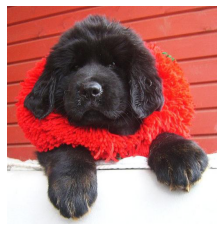

In [18]:
# Invoking the function to visualise few random individual images, their shapes and corresponding labels
visualising_images(0)

- The shape of the above illustrated image (at index 1) is (500, 481, 3) exhibiting the selected image has a resolution of 500 x 481 dimension with 3 (RGB) channels, the height and width of the image, its color intensity respectively. 

- Its shape indicates that it is a color image represented in a 3D array.

- The corresponding label for the selected image is 'Tibetan_mastiff' dog breed.

The shape of the image below is: (224, 224, 3)
The label of the image below is: TURQUOISE MOTMOT


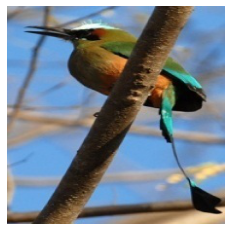

In [19]:
# Invoking the function to visualise few random individual images, their shapes and corresponding labels
visualising_images(1100)

- The above displayed image, (from index 1101), is a square-shaped color image of dimensions of 224 x 224. This image is of 'TURQUOISE MOTMOT' bird species, as indicated by its corresponding label.

The shape of the image below is: (390, 390, 3)
The label of the image below is: Lhasa


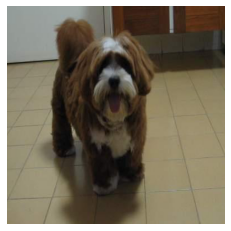

In [20]:
# Invoking the function to visualise few random individual images, their shapes and corresponding labels
visualising_images(1900)

- The image has a shape of (390, 390, 3), which indicates that it is a color image represented in a 3D array. The label of the image is 'Lhasa' dog breed.

The shape of the image below is: (224, 224, 3)
The label of the image below is: SCARLET MACAW


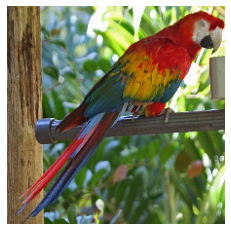

In [21]:
# Invoking the function to visualise few random individual images, their shapes and corresponding labels
visualising_images(2900)

- The image's form (224, 224, 3) suggests that it is a colour image of the 'SCARLET MACAW' bird species.

The shape of the image below is: (386, 500, 3)
The label of the image below is: Bernese_mountain_dog


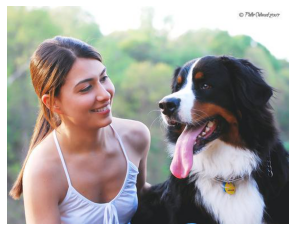

In [22]:
# Invoking the function to visualise few random individual images, their shapes and corresponding labels
visualising_images(3200)

- The image's shape (386, 500, 3) indicates that it is a colour image of the dog breed 'SBernese_mountain'.

### 3. Preprocessing the Images from the Image Classification Dataset

#### 3.1 Splitting images into into training - 70%, validation - 15% and testing - 15%

In [23]:
# Defining the base directory path for the the directory containing the image classification dataset
classification_dataset = '/root/42028/Assignment2/classification_dataset'

# Defining directory paths for training, validation, and testing datasets within the image classification dataset
train_dir = '/root/42028/Assignment2/classification_dataset/train'
validation_dir = '/root/42028/Assignment2/classification_dataset/validation'
test_dir = '/root/42028/Assignment2/classification_dataset/test'

In [24]:
# Creating directories for training, validation, and testing datasets if they don't exist
for directory in [train_dir, validation_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

In [25]:
# Splitting the dataset into train - 70% and test - 20% datasets with the random value (as student identification)
train_df, validation_test_df = train_test_split(df_classification_dataset, test_size=0.3, random_state=14370946)

# Further splitting the training dataset into train - 70% and validation - 10% datasets
validation_df, test_df = train_test_split(validation_test_df, test_size=0.5, random_state=14370946)

In [26]:
# Defining the function to copy images to appropriate training, validation, and testing directories
def copy_images(df, directory):
    for index, row in df.iterrows():
        image_name = row['Image Names']
        image_label = row['Labels']
        image_path = row['Image Paths']
        label_dir = os.path.join(directory, image_label)
        os.makedirs(label_dir, exist_ok=True)
        copyfile(image_path, os.path.join(label_dir, image_name))

In [ ]:
# Invoking the function to copy images from appropriate directories to its datasets
copy_images(train_df, train_dir)
copy_images(validation_df, validation_dir)
copy_images(test_df, test_dir)

In [27]:
# Checking the number of images in the training, validation, and testing datasets
print('Images in Training Dataset:', len(train_df))
print('Images in Validation Dataset:', len(validation_df))
print('Images in Testing Dataset:', len(test_df))

Images in Training Dataset: 2286
Images in Validation Dataset: 490
Images in Testing Dataset: 490


- This splitting technique ensures that 70% of the data (2286 samples out of 3266) is utilised to train the model, with the remaining 15% each (490 samples out of 3266) saved for validating and evaluating the model's performance. 

- As a result, it is easier to examine how effectively the model generalises on unseen data.


In [28]:
# Setting the random seed values (student identification) for numpy and tensorflow reproducibility
np.random.seed(14370946)
tf.random.set_seed(14370946)

#### 3.2 Preparing, rescaling and normalising the images

In [29]:
# Initialising ImageDataGenerator for rescaling and normalising the images for training, validation and testing dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Utilizing train_datagen data generator for flowing training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=50,
    class_mode='categorical')

# Utilizing validation_datagen data generator for flowing validation images in batches
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256), ##256, 256
    batch_size=50,
    class_mode='categorical') ## might be a issue so try to use categorical

# Utilizing test_datagen data generator for flowing testing images in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=50,
    class_mode='categorical')

Found 2286 images belonging to 20 classes.
Found 490 images belonging to 20 classes.
Found 490 images belonging to 20 classes.


The above demonstrates the preparation, resizing and normalising the images data before proceeding with classification task.

- The 3 ImageDataGenerator objects namely 'train_datagen', 'validation_datagen' and 'test_datagen' are initialized for rescaling and normalizing the images in the training, validation, and testing datasets, respectively.
   
- The 'train_generator', 'validation_generator', and 'test_generator' are initialized using the flow_from_directory method of the ImageDataGenerator object for fetching images from the specified directories in batches during model training, validation, and testing phases, respectively.
   
- All the images are resized to a uniform target size of (256, 256) pixels.

- The normalisation is performed by dividing 255 scales to the range [0, 1] to ensure that all input features dimension values are within this range and with similar scales, making them more suitable for processing of neural networks.

- The batch size is set to 50, indicating that each batch will contain 50 images.

- The class mode set to 'categorical', indicates that the labels for the images are one-hot encoded for transforming categorical labels to numerical.


### 4. Building CNN Architecture for Image Classification

#### 4.1 Baseline CNN Classifier Model -> VGG19 CNN Architecture

In [29]:
# Loading the pre-trained VGG19 CNN model
baseline_vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

 - For the baseline CNN classifier, loading a pre-trained VGG19 convolutional neural network (CNN) model with weights pre-trained on the ImageNet dataset. 
 
- Additionally, excluding its fully connected layer (top layer) which removes the classifier part of the VGG19 model. Thus, the model will only consist of the convolutional base, making it suitable for feature extraction.

- And, the input images will have dimensions of 256x256 pixels with 3 channels (RGB) color images.

In [30]:
# Create a fully connected layer for this Image Classification
fully_connected_layer = layers.Flatten()(baseline_vgg19_model.output)
fully_connected_layer = layers.Dense(1024, activation='relu')(fully_connected_layer) 
image_classifier_with_vgg19 = layers.Dense(20, activation='softmax')(fully_connected_layer)

- Providing the custom fully connected layer to a pre-trained VGG19 model for image classification to differentiate between the specified 20 categories of dog breeds and bird species based on the features learned from ImageNet data.

- The softmax activation function normalizes the output into a probability distribution over the 20 classes, representing the likelihood of each class given the input image.

In [31]:
# Creating the CNN model by combining the baseline VGG19 model with the fully connected classification layers for image classification
model = Model(inputs=baseline_vgg19_model.input, outputs=image_classifier_with_vgg19)

In [32]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['acc'])

The above compilation step prepares the VGG19 CNN model for training using the specified optimizer, loss function, and evaluation metrics.

- It compiles a neural network model for training using the Adam optimizer with a learning rate of 1e-4. 

- Employing categorical cross-entropy as the loss function, which is suitable for multi-class classification tasks. 

- Using accuracy metric during training to evaluate the model's performance.


In [33]:
# Displaying the model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

The above summary provides a detailed overview of the VGG19 model's architecture, including the input shape, layer types, and the number of parameters.

- Input layer: The model takes input images of shape (256, 256, 3), indicating images with a height and width of 256 pixels and 3 color channels (RGB).

- Convolutional Blocks: The model consists of 5 convolutional blocks with convolutional (Conv2D) followed by max-pooling layers. Each convolutional block progressively extracts features from the input image.

- Fully Connected Layer: The output of the last convolutional block is flattened into a size 32768 vector and passed through a fully connected layer with 1024 units (dense layer). This layer is followed by another dense layer with 20 units, which is the output layer, classifying the input images into one of 20 categories.

- Parameters: The model has a total of 53,600,340 parameters, all of which are trainable. These parameters represent the weights and biases of the convolutional and dense layers. There are no non-trainable parameters in this baseline model, indicating that all layers are trainable.


In [34]:
# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7f35a2fc70> True
<keras.layers.convolutional.Conv2D object at 0x7f7f35976130> True
<keras.layers.convolutional.Conv2D object at 0x7f7f35976a90> True
<keras.layers.pooling.MaxPooling2D object at 0x7f7f35976790> True
<keras.layers.convolutional.Conv2D object at 0x7f7f35923ee0> True
<keras.layers.convolutional.Conv2D object at 0x7f7f35929c40> True
<keras.layers.pooling.MaxPooling2D object at 0x7f7f35929bb0> True
<keras.layers.convolutional.Conv2D object at 0x7f7f3596bb20> True
<keras.layers.convolutional.Conv2D object at 0x7f7f358af160> True
<keras.layers.convolutional.Conv2D object at 0x7f7f358b03d0> True
<keras.layers.convolutional.Conv2D object at 0x7f7f3592dee0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f7f35929b80> True
<keras.layers.convolutional.Conv2D object at 0x7f7f358b3dc0> True
<keras.layers.convolutional.Conv2D object at 0x7f7f358b3be0> True
<keras.layers.convolutional.Conv2D object at 0x7f7f358b7130> True
<keras.l

The output displays the trainable status of each layer in the model.

- As all layers are trainable, the baseline model's weights and biases will be updated throughout the training process. 

- This enables the baseline model to learn from the training data and enhance its performance over time.


In [35]:
# Path and file format hdf5 for the checkpointing
filepath='/root/42028/Assignment2/classification_dataset/standard_weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False,
                                              mode='auto', save_freq='epoch')

In the above step setting up a callback for model checkpointing during the training process by saving the baseline model's weights to hdf5 files after every epoch.

Following this, training the baseline VGG19 CNN classifier model using the specified training and validation data generators for 200 epochs and saving its weights after each epoch using the checkpoint callback.

In [ ]:
# Training the baseline VGG19 CNN classifier model
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=200,  # Adjust number of epochs as needed
                    validation_data=validation_generator,
                    validation_steps=9,
                    callbacks = [checkpoint],
                    verbose=2)

Epoch 1/200
45/45 - 97s - loss: 2.9232 - acc: 0.0939 - val_loss: 2.7126 - val_acc: 0.1600
Epoch 2/200
45/45 - 55s - loss: 2.4171 - acc: 0.2303 - val_loss: 2.4442 - val_acc: 0.1822
Epoch 3/200
45/45 - 45s - loss: 1.9452 - acc: 0.3520 - val_loss: 1.8594 - val_acc: 0.3978
Epoch 4/200
45/45 - 45s - loss: 1.5770 - acc: 0.4776 - val_loss: 1.5968 - val_acc: 0.4667
Epoch 5/200
45/45 - 45s - loss: 1.1987 - acc: 0.5930 - val_loss: 1.5603 - val_acc: 0.5022
Epoch 6/200
45/45 - 45s - loss: 0.9668 - acc: 0.6816 - val_loss: 1.5111 - val_acc: 0.5333
Epoch 7/200
45/45 - 45s - loss: 0.6609 - acc: 0.7742 - val_loss: 1.5157 - val_acc: 0.5444
Epoch 8/200
45/45 - 45s - loss: 0.4705 - acc: 0.8421 - val_loss: 1.3972 - val_acc: 0.5911
Epoch 9/200
45/45 - 45s - loss: 0.3529 - acc: 0.8797 - val_loss: 2.0127 - val_acc: 0.5733
Epoch 10/200
45/45 - 45s - loss: 0.2322 - acc: 0.9191 - val_loss: 1.7951 - val_acc: 0.5911
Epoch 11/200
45/45 - 45s - loss: 0.1734 - acc: 0.9423 - val_loss: 1.7819 - val_acc: 0.6000
Epoch 12

In [50]:
!pwd

/root/42028/Assignment2


In [52]:
from tensorflow.keras.models import load_model

# Load the model
baseline_vgg19_model = load_model('/root/42028/Assignment2/classification_dataset/standard_weights/weights.200-4.10.hdf5')

In [54]:
# Evaluate the model on training and validation data
train_loss, train_accuracy = baseline_vgg19_model.evaluate(train_generator)
val_loss, val_accuracy = baseline_vgg19_model.evaluate(validation_generator)

print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


10/10 [==============================] - 3s 292ms/step - loss: 3.9743 - acc: 0.6306
Training Loss: 2.4926524844204323e-08, Training Accuracy: 1.0
Validation Loss: 3.9743106365203857, Validation Accuracy: 0.6306122541427612


In [57]:
# Evaluating the baseline model on the test images and checking the accuracy
testing_loss, testing_acc = baseline_vgg19_model.evaluate(test_generator, verbose=1)

print('Testing Loss:', '{:.4f}'.format(testing_loss))
print('Testing Accuracy:', '{:.4f}'.format(testing_acc))

10/10 [==============================] - 3s 297ms/step - loss: 3.2405 - acc: 0.6878
Testing Loss: 3.2405
Testing Accuracy: 0.6878


Loading the trained baseline VGG19 CNN model, that was saved after training for 200 epochs with a validation loss of 4.10.

Once loaded, the baseline model is used for evaluation on both the training and validation datasets. 

- The baseline VGG19 model's incredibly low training loss of 2.4926 and accuracy of 100% on the training dataseet, suggests that the model has effectively learned the patterns and features found in the training images of dog breeds and bird species. 

- However, a low loss could indicate overfitting, in which the model memorises the training data rather than learning generalizable characteristics.

- While, the validation loss of 3.9743 and accuracy of 63.06% indicates that the baseline model performs less optimally on the validation dataset compared to the training dataset.

- Thus, the model model performs exceedingly well on the training data, its performance on the validation data is significantly lower, indicating remarkable overfitting.

- Additionally, further investigation, such as adjusting the model architecture is necessary to enhance the model's ability to accurately classify images of dog breeds and bird species on unseen data and improve generalization performance.

#### 4.2 Customized CNN Classifier Model -> VGG19 CNN Architecture

In [30]:
# Initialising ImageDataGenerator for rescaling and normalising the images for training, validation and testing dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Utilizing train_datagen data generator for flowing training images in batches
train_generator_customvgg19 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=50,
    class_mode='sparse')

# Utilizing validation_datagen data generator for flowing validation images in batches
validation_generator_customvgg19 = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=50,
    class_mode='sparse')

# Utilizing test_datagen data generator for flowing testing images in batches
test_generator_customvgg19 = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=50,
    class_mode='sparse')

Found 2286 images belonging to 20 classes.
Found 490 images belonging to 20 classes.
Found 490 images belonging to 20 classes.


In [33]:
# Loading the pre-trained VGG19 CNN model
customised_vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

- Similar to baseline, for the customised CNN classifier, loading the pre-trained VGG19 convolutional neural network (CNN) model using the weights trained on the ImageNet dataset.

- The fully connected layer (top layer) is excluded and accept input images of size 256x256 pixels with 3 color channels.

In [34]:
# Define the layers up to block4_conv1 as trainable
for layer in customised_vgg19_model.layers:
    if layer.name.startswith('block4'):
        layer.trainable = False
    else:
        layer.trainable = True

To address the significant overfitting observed in the above baseline model, adjusting the architecture in the customised CNN classifier VGG19 model by selectively freezing the convolutional layers of 'block4' layer. 

- Iteration is performed through all the layers of the customised VGG19 model and it checks if the layer name starts with 'block4'. If it does, it sets the trainable attribute of that layer to False. 

- Thus, if the layer's name does not start with 'block4', it sets the trainable attribute to True, allowing those layers to be trained.

- By freezing the layers, the customised model retains the feature extraction capabilities learnt from the ImageNet dataset, while the trainable layers can adapt to new task specific features during training on the classification dataset at hand.


In [46]:
# Create a fully connected layer for this Image Classification
fully_connected_layer = layers.Flatten()(customised_vgg19_model.output)
fully_connected_layer = layers.Dense(1024, activation='relu')(fully_connected_layer)
fully_connected_layer = layers.Dense(512, activation='relu')(fully_connected_layer)## too less 1024 ## add more dense layer 512,
fully_connected_layer = layers.Dense(256, activation='relu')(fully_connected_layer)
customised_classifier_with_vgg19 = layers.Dense(20, activation='softmax')(fully_connected_layer)

The above creates a classification model by adding fully connected layer on top of the pre-trained VGG19 convolutional base to classify specified 20 categories of dog breeds and bird species.

- Three dense (fully connected) layers are added after the flatten layer. Each dense layer consists of a specified number of neurons (1024, 512 and 256) and uses the ReLU activation function.

- Finally, a dense layer with 20 neurons responsible for classification of one of the 20 possible categories. The softmax activation function normalizes the output to represent class probabilities.

In [47]:
# Creating the CNN model by combining the customised VGG19 model with the fully connected classification layers for image classification
model = Model(inputs=customised_vgg19_model.input, outputs=customised_classifier_with_vgg19)

In [48]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

def lr_schedule(epoch):
    initial_lr = 1e-4
    decay_rate = 0.1
    decay_steps = 10000
    lr = initial_lr * decay_rate ** (epoch / decay_steps)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

- Adding a learning rate scheduler function that changes the learning rate during training epochs according to a predefined function. 

- This could help to optimise the training process, particularly for datasets with varied properties.


In [49]:
# Compiling the model with initial learning rate
initial_learning_rate = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='sparse_categorical_crossentropy', metrics=['acc'])

The above compilation step prepares the customised VGG19 CNN model for training using the specified optimizer, loss function, and evaluation metrics.

- It compiles the model using the initial learning rate determined by the lr_schedule function. 

- The loss function 'sparse_categorical_crossentropy', is commonly used for multi-class classification tasks where the labels are integers.

- The accuracy metrics is used for evaluation during training which measures the percentage of correctly classified samples.


In [94]:
# Displaying the model summary
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

The above summary provides a detailed overview of the customised VGG19 model's architecture, including input shape, layer types, and parameter count.

- Input layer: The model accepts input images of the dimension (256, 256, 3), which represent images having a height and width of 256 pixels and three colour channels (RGB).

- Convolutional Blocks: There are 5 convolutional blocks comprising convolutional (Conv2D) and max-pooling (MaxPooling2D) layers that are responsible for feature extraction from the input images.

- Flatten Layer: The output of the last convolutional block is flattened to a 32768 size vector that prepares the extracted features for the fully connected layers.

- Fully Connected Layer: there are 3 dense layers each with 1024, 512 and 256 units and ReLU activation. And lastly, there is an output dense layer with 20 units (corresponding to the 20 classes) and softmax activation, which outputs the probabilities for each class.

-  Parameters: The model has a total of 53,600,340 parameters, out of which 45,981,524 are trainable that are updated during training. 8,259,584 parameters are non-trainable, corresponding to the weights of the pre-trained VGG19 layers that are frozen and not updated during training.


In [95]:
# Check the trainable status of the individ`ual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4bc8ff4df0> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc8ff4790> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc9058310> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc8ff4760> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc9005880> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc8f3d220> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc91a24f0> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc8f418b0> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc9008400> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc8feb7c0> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc9043a90> True
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc8f41550> True
<keras.layers.convolutional.Conv2D object at 0x7f4bc91d2430> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc8f460a0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc8f46940> False
<kera

The output displays the trainable status of each layer in the customised model.

- The layers whose names begin with 'block4' have the trainable state set to False, indicating that they cannot be trained. 

- While all other layers' trainability state is set to True.


In [96]:
# Path and file format hdf5 for the checkpointing
filepath='/root/42028/Assignment2/classification_dataset/customised_weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False,
                                              mode='auto', save_freq='epoch')

- In the above step, setting a callback for model checkpointing during the training process by saving the customised model's weights to hdf5 files after each epoch.

- Following this, customised VGG19 CNN classifier model is then trained for 50 epochs using the training and validation data generators, with weights saved after each epoch using the checkpoint callback.


In [97]:
# Training the customised VGG19 CNN classifier model
history = model.fit(train_generator_customvgg19,
                    steps_per_epoch=45,
                    epochs=50,  # Adjust number of epochs as needed
                    validation_data=validation_generator_customvgg19,
                    validation_steps=9,
                    callbacks = [checkpoint],
                    verbose=2)

Epoch 1/50
45/45 - 56s - loss: 2.3450 - acc: 0.2733 - val_loss: 1.3665 - val_acc: 0.5467
Epoch 2/50
45/45 - 42s - loss: 0.9148 - acc: 0.7008 - val_loss: 0.7853 - val_acc: 0.7133
Epoch 3/50
45/45 - 43s - loss: 0.3006 - acc: 0.9061 - val_loss: 0.8368 - val_acc: 0.7400
Epoch 4/50
45/45 - 43s - loss: 0.1528 - acc: 0.9486 - val_loss: 0.6396 - val_acc: 0.8244
Epoch 5/50
45/45 - 43s - loss: 0.1074 - acc: 0.9678 - val_loss: 0.6543 - val_acc: 0.8156
Epoch 6/50
45/45 - 43s - loss: 0.0582 - acc: 0.9843 - val_loss: 0.5899 - val_acc: 0.8111
Epoch 7/50
45/45 - 43s - loss: 0.0642 - acc: 0.9831 - val_loss: 0.7769 - val_acc: 0.8111
Epoch 8/50
45/45 - 43s - loss: 0.0590 - acc: 0.9835 - val_loss: 0.7537 - val_acc: 0.8111
Epoch 9/50
45/45 - 43s - loss: 0.0105 - acc: 0.9973 - val_loss: 0.8172 - val_acc: 0.8178
Epoch 10/50
45/45 - 43s - loss: 0.0266 - acc: 0.9942 - val_loss: 1.0868 - val_acc: 0.7600
Epoch 11/50
45/45 - 43s - loss: 0.0172 - acc: 0.9964 - val_loss: 0.6208 - val_acc: 0.8244
Epoch 12/50
45/45 -

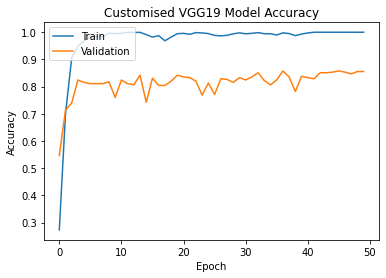

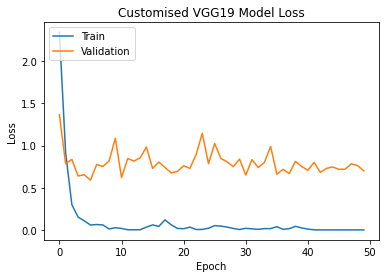

In [99]:
# Plotting training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Customised VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Customised VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The above results and graphs illustrate the performance of the customised VGG19 CNN classifier model after 50 training epochs.

- The training loss and accuracy of 1.3490 and 1.0 respectively, indicates that the model has correctly classified all training samples. And the loss of 0.7013 and accuracy of 0.8556 suggests that the model has correctly classified approximately 85.56% of the validation samples.

- Although accuracy has improved on the validation dataset, there are significant fluctuations. Therefore, further experimenting to stabilise the customised VGG19 CNN classifier model.


In [100]:
# Saving the entire model with its architecture, weights, optimizer state and all configurations 
model.save('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_model.h5')

import pickle

# Saving the history object including the training/validation loss and metrics during model training
with open('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
# Load the last weights
customised_vgg19_last_weights = '/root/42028/Assignment2/classification_dataset/customised_weights/weights.50-0.70.hdf5'  # Update this path to the last saved weights file
model.load_weights(customised_vgg19_last_weights)

# Continue training from the last epoch
additional_epochs = 50
history = model.fit(train_generator_customvgg19,
                    steps_per_epoch=45,
                    epochs= 50 + additional_epochs,  # Adjust the total number of epochs
                    validation_data=validation_generator_customvgg19,
                    validation_steps=9,
                    callbacks=[checkpoint],
                    initial_epoch=50,  # Start from the last epoch
                    verbose=2)

Epoch 51/100
45/45 - 42s - loss: 1.2657e-05 - acc: 1.0000 - val_loss: 0.7037 - val_acc: 0.8511
Epoch 52/100
45/45 - 42s - loss: 1.0921e-05 - acc: 1.0000 - val_loss: 0.7561 - val_acc: 0.8467
Epoch 53/100
45/45 - 42s - loss: 1.0559e-05 - acc: 1.0000 - val_loss: 0.7653 - val_acc: 0.8511
Epoch 54/100
45/45 - 42s - loss: 9.5972e-06 - acc: 1.0000 - val_loss: 0.7514 - val_acc: 0.8489
Epoch 55/100
45/45 - 42s - loss: 8.7446e-06 - acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.8622
Epoch 56/100
45/45 - 42s - loss: 8.1750e-06 - acc: 1.0000 - val_loss: 0.7725 - val_acc: 0.8533
Epoch 57/100
45/45 - 42s - loss: 7.5430e-06 - acc: 1.0000 - val_loss: 0.7879 - val_acc: 0.8489
Epoch 58/100
45/45 - 42s - loss: 7.0651e-06 - acc: 1.0000 - val_loss: 0.7586 - val_acc: 0.8489
Epoch 59/100
45/45 - 42s - loss: 6.5657e-06 - acc: 1.0000 - val_loss: 0.7640 - val_acc: 0.8556
Epoch 60/100
45/45 - 42s - loss: 6.2437e-06 - acc: 1.0000 - val_loss: 0.7995 - val_acc: 0.8467
Epoch 61/100
45/45 - 42s - loss: 5.7509e-06 - acc:

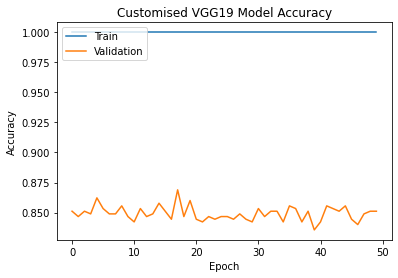

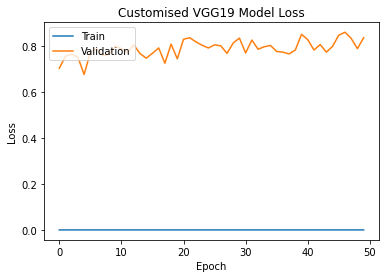

In [103]:
# Plotting training & validation accuracy values
#plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Customised VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
#plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Customised VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [104]:
# Saving the entire model with its architecture, weights, optimizer state and all configurations 
model.save('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_model_v1.h5')

# Saving the history object including the training/validation loss and metrics during model training
with open('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_history_v1.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [109]:
# Evaluating the customised model on the test images and checking the accuracy
testing_loss, testing_acc = model.evaluate(test_generator_customvgg19, verbose=1)

print('Testing Loss:', '{:.4f}'.format(testing_loss))
print('Testing Accuracy:', '{:.4f}'.format(testing_acc))

10/10 [==============================] - 3s 288ms/step - loss: 0.7194 - acc: 0.8633
Testing Loss: 0.7194
Testing Accuracy: 0.8633


The above results and graphs show the performance of the custom VGG19 CNN classifier model after 100 training epochs.

- The validation loss of 0.8367 after 100 epochs is slightly higher than after 50 epochs (0.7013), suggesting that the model's performance on validation dataset may have slightly deteriorated with additional training. 

- Additionally, the validation accuracy of 85.11% after 100 epochs is almost same after 50 epochs (85.56%) indicates that the model seems to have reached a point where additional training does not significantly improve performance on the validation set.

- Further, the testing loss of 0.7194 and accuracy of 86.33% suggests that the model is performing well in terms of classification on unseen data.

- To stabalise the customised model, experimenting by employing dropout technique. 

In [37]:
!pwd

/root/42028/Assignment2


In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
# Load the last weights
customised_vgg19_last_weights = '/root/42028/Assignment2/classification_dataset/customised_weights/weights.100-0.84.hdf5'  # Update this path to the last saved weights file
model.load_weights(customised_vgg19_last_weights)

# Adding Dropout layers
fully_connected_layer = layers.Flatten()(customised_vgg19_model.output)
fully_connected_layer = layers.Dense(1024, activation='relu')(fully_connected_layer)
fully_connected_layer = Dropout(0.5)(fully_connected_layer)  # Add Dropout here
fully_connected_layer = layers.Dense(512, activation='relu')(fully_connected_layer)
fully_connected_layer = Dropout(0.5)(fully_connected_layer)  # Add Dropout here
fully_connected_layer = layers.Dense(256, activation='relu')(fully_connected_layer)
fully_connected_layer = Dropout(0.5)(fully_connected_layer)  # Add Dropout here
customised_classifier_with_vgg19 = layers.Dense(20, activation='softmax')(fully_connected_layer)

- Loading the weights of the customised VGG19 model from the last checkpointed file, which contains the weights saved after the 100th epoch, to continue training.

- Adding dropout layers with a dropout rate of 0.5 to the fully connected layer after the three dense layers with 1024, 512, and 256 units in the anticipation of stabilising the customised VGG19 model.


In [54]:
# Combine the baseline VGG19 model with the fully connected classification layers
model = Model(inputs=customised_vgg19_model.input, outputs=customised_classifier_with_vgg19)

In [55]:
# Compiling the model with initial learning rate
initial_learning_rate = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [56]:
# Displaying the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [57]:
# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f37d5429fd0> True
<keras.layers.convolutional.Conv2D object at 0x7f37d52a4310> True
<keras.layers.convolutional.Conv2D object at 0x7f37d52a4df0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f37d52a4af0> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a732e0> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a73f70> True
<keras.layers.pooling.MaxPooling2D object at 0x7f37d4a78bb0> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a7b6a0> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a7d460> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a7d310> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a7b130> True
<keras.layers.pooling.MaxPooling2D object at 0x7f37d4a7dc10> True
<keras.layers.convolutional.Conv2D object at 0x7f37d4a82970> False
<keras.layers.convolutional.Conv2D object at 0x7f37d4a81790> False
<keras.layers.convolutional.Conv2D object at 0x7f37d4a869d0> False
<kera

In [63]:
# Path and file format hdf5 for the checkpointing
filepath='/root/42028/Assignment2/classification_dataset/customised_weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False,
                                              mode='auto', save_freq='epoch')

In [65]:
# Continue training from the last epoch
additional_epochs = 50
history = model.fit(train_generator_customvgg19,
                               steps_per_epoch=45,
                               epochs=100 + additional_epochs,  # Adjust the total number of epochs
                               validation_data=validation_generator_customvgg19,
                               validation_steps=9,
                               callbacks=[checkpoint],
                               initial_epoch=100,  # Start from the last epoch
                               verbose=2)


Epoch 101/150
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2024-05-03 11:28:43.045 tensorflow-2-6-gpu--ml-g4dn-xlarge-c97c437bb7a567fed6fc3e40998a:17 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-05-03 11:28:43.071 tensorflow-2-6-gpu--ml-g4dn-xlarge-c97c437bb7a567fed6fc3e40998a:17 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
45/45 - 109s - loss: 3.2190 - acc: 0.0626 - val_loss: 2.9811 - val_acc: 0.0778
Epoch 102/150
45/45 - 53s - loss: 2.9485 - acc: 0.0912 - val_loss: 2.7572 - val_acc: 0.2156
Epoch 103/150
45/45 - 43s - loss: 2.7531 - acc: 0.1360 - val_loss: 2.4741 - val_acc: 0.2200
Epoch 104/150
45/45 - 42s - loss:

In [66]:
# Evaluating the customised model on the test images and checking the accuracy
testing_loss, testing_acc = model.evaluate(test_generator_customvgg19, verbose=1)

print('Testing Loss:', '{:.4f}'.format(testing_loss))
print('Testing Accuracy:', '{:.4f}'.format(testing_acc))

10/10 [==============================] - 13s 1s/step - loss: 0.5426 - acc: 0.8939
Testing Loss: 0.5426
Testing Accuracy: 0.8939


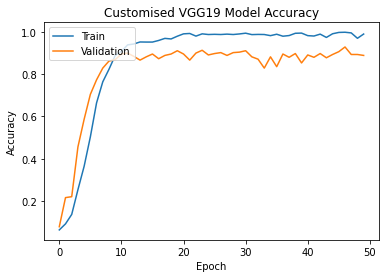

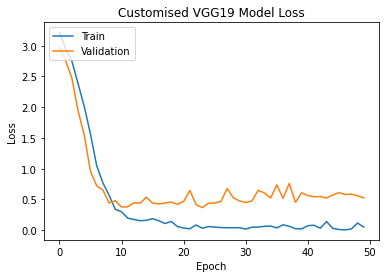

In [69]:
#Plotting training & validation accuracy values
#plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Customised VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
#plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Customised VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The above results and graphs represents the performance of the custom VGG19 CNN classifier model after 150 training epochs.

- The validation loss decreased from 0.8367 to 0.5245, indicating that the model's performance on validation data improved as well.

-  And, the validation accuracy increased from 85.11% to 88.89%, showing that the model's ability to generalize on the validation data improved over the course of training while employing dropout technique.

- The training process seems to be stable, with no significant fluctuations in loss or accuracy observed.

- Additionally, after 150 epochs, the customised model's performance on the testing datast improved significantly, with a testing accuracy of 89.39% and a testing loss of 0.5426. 

Overall, the model's performance improved after 150 epochs compared to 100 epochs, demonstrating that continuous training resulted in considerable stability and better generalisation on the testing dataset.


In [70]:
# Saving the entire model with its architecture, weights, optimizer state and all configurations 
model.save('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_model_v2.h5')

# Saving the history object including the training/validation loss and metrics during model training
with open('/root/42028/Assignment2/classification_dataset/customised_weights/customised_vgg19_history_v2.pkl', 'wb') as file:
    pickle.dump(history.history, file)